In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load FER-2013 dataset
csv_path = "/content/fer2013.csv"
data = pd.read_csv(csv_path)

# Extract features and labels
pixels = data["pixels"].tolist()
emotions = data["emotion"].tolist()

# Clean and validate pixel data
valid_pixels = []
for pixel in pixels:
    try:
        # Convert the pixel string into a numpy array and validate its length
        pixel_array = np.fromstring(pixel, dtype=np.uint8, sep=' ')
        if pixel_array.shape[0] == 2304:  # Ensure the array has exactly 48x48 pixels
            valid_pixels.append(pixel_array)
    except ValueError:
        continue  # Skip invalid rows

# Convert valid pixels to a numpy array
X = np.array(valid_pixels).reshape(-1, 48, 48, 1).astype("float32") / 255.0  # Normalize to [0, 1]

# Filter the corresponding valid labels
valid_indices = [i for i, pixel in enumerate(pixels) if len(np.fromstring(pixel, dtype=np.uint8, sep=' ')) == 2304]
y = np.array(emotions)[valid_indices]
y = to_categorical(y, num_classes=7)


In [ ]:
print(f"Number of valid samples in X: {X.shape[0]}")
print(f"Number of valid labels in y: {y.shape[0]}")


Number of valid samples in X: 32619
Number of valid labels in y: 32619


In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.2466 - loss: 1.8320 - val_accuracy: 0.2914 - val_loss: 1.7397
Epoch 2/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.3316 - loss: 1.6918 - val_accuracy: 0.3930 - val_loss: 1.5743
Epoch 3/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3902 - loss: 1.5815 - val_accuracy: 0.4155 - val_loss: 1.5108
Epoch 4/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4222 - loss: 1.5028 - val_accuracy: 0.4444 - val_loss: 1.4320
Epoch 5/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4416 - loss: 1.4482 - val_accuracy: 0.4715 - val_loss: 1.3860
Epoch 6/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4729 - loss: 1.3887 - val_accuracy: 0.4963 - val_loss: 1.3389
Epoch 7/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4877 - loss: 1.3458 - val_accuracy: 0.5058 - val_loss: 1.3115
Epoch 8/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5072 - loss: 1.2998 - va

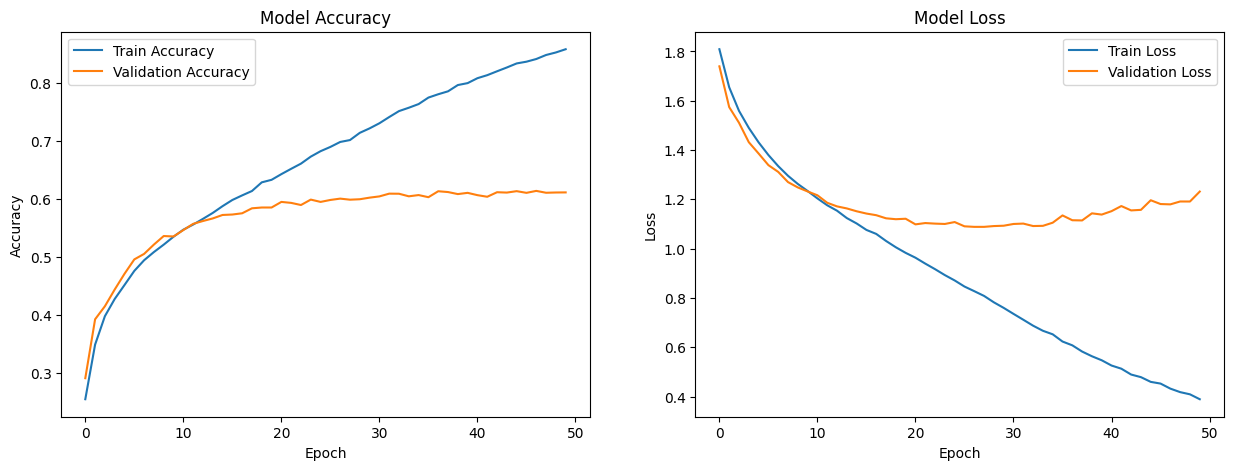

204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6010 - loss: 1.2724
Validation Accuracy: 61.19%


In [ ]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Train the model
batch_size = 64
num_epoch = 50

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=num_epoch,
    validation_data=(X_val, y_val)
)

# Plot training history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    # Accuracy plot
    axs[0].plot(model_history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(model_history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend()

    # Loss plot
    axs[1].plot(model_history.history['loss'], label='Train Loss')
    axs[1].plot(model_history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend()

    plt.show()

plot_model_history(history)

# Save the model weights
model.save_weights('model.weights.h5')

# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import matplotlib.pyplot as plt

def test_emotion_detector(image_path, model):
    # Dictionary for emotion labels
    emotion_dict = {
        0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy",
        4: "Sad", 5: "Surprised", 6: "Neutral"
    }

    # Read the image
    frame = cv2.imread(image_path)
    if frame is None:
        raise ValueError("Could not read the image. Please check the path.")

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Load the face cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) == 0:
        print("No faces detected in the image.")
        return

    # Create a figure for displaying results
    plt.figure(figsize=(12, 8))

    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(frame_rgb, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)

        # Extract and preprocess the face region
        roi_gray = gray[y:y + h, x:x + w]
        try:
            roi_gray = cv2.resize(roi_gray, (48, 48))  # Resize to 48x48 for FER-2013
        except Exception as e:
            print(f"Error resizing face ROI: {e}")
            continue

        img_pixels = img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255.0  # Normalize pixel values to [0, 1]

        # Make prediction
        predictions = model.predict(img_pixels, verbose=0)
        max_index = np.argmax(predictions[0])
        emotion_label = emotion_dict[max_index]
        confidence = round(predictions[0][max_index] * 100, 2)

        # Display emotion label and confidence
        label = f"{emotion_label} ({confidence}%)"
        cv2.putText(frame_rgb, label, (x+20, y-60),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Print prediction details
        print(f"\nPredicted Emotion: {emotion_label}")
        print(f"Confidence: {confidence}%")
        print("\nAll Emotions Probabilities:")
        for emotion, prob in zip(emotion_dict.values(), predictions[0]):
            print(f"{emotion}: {round(prob * 100, 2)}%")

    # Display the image with annotations
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

# Example usage:
# Replace 'path_to_your_image.jpg' with the actual path to your image.
# Make sure `model` is the trained FER-2013 model.
# test_emotion_detector('path_to_your_image.jpg', model)


In [ ]:
# If you haven't already loaded the model
model.load_weights('model.weights.h5')


Predicted Emotion: Surprised
Confidence: 99.44%

All Emotions Probabilities:
Angry: 0.16%
Disgusted: 0.0%
Fearful: 0.4%
Happy: 0.0%
Sad: 0.0%
Surprised: 99.44%
Neutral: 0.0%


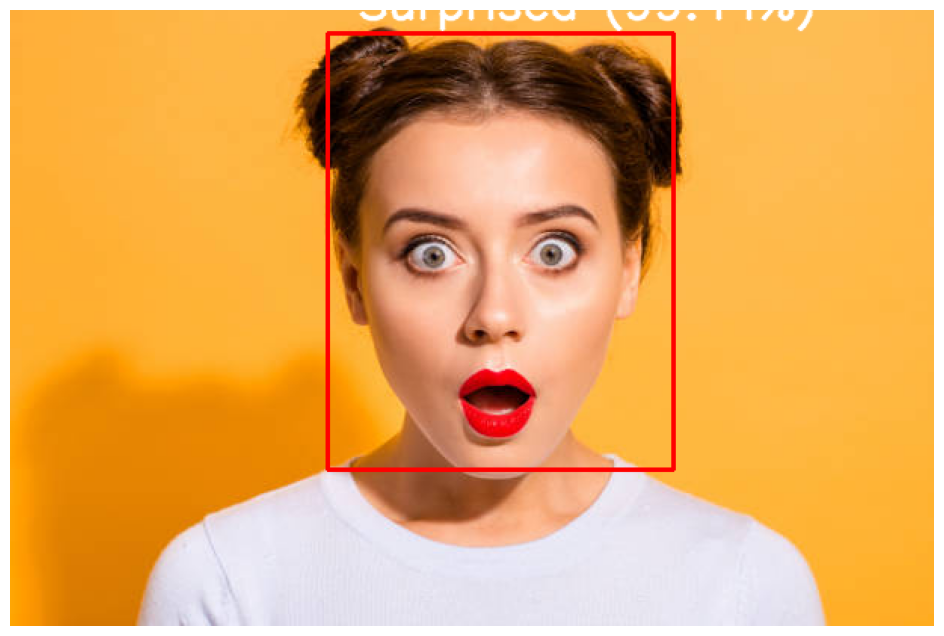

In [ ]:
# Replace with your image path
test_emotion_detector('/content/suprised.jpg', model)

In [ ]:
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from threading import Thread
from queue import Queue

def js_to_image(js_reply):
    """Convert JS image data to OpenCV image"""
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

def bbox_to_bytes(bbox_array):
    """Convert OpenCV image to bytes for display"""
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGB')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='jpeg', quality=70)  # Reduced quality for better performance
    bbox_bytes = 'data:image/jpeg;base64,{}'.format(b64encode(iobuf.getvalue()).decode())
    return bbox_bytes

# JavaScript to capture webcam
def video_stream():
    js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "user" }});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here to stop the camera</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getBoundingClientRect();
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

    display(js)

class EmotionDetector:
    def __init__(self, model, skip_frames=2):
        self.model = model
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy",
                           4: "Sad", 5: "Surprised", 6: "Neutral"}
        self.skip_frames = skip_frames
        self.frame_count = 0
        self.last_predictions = []
        self.processing_queue = Queue(maxsize=2)
        self.result_queue = Queue()

        # Start processing thread
        self.processing_thread = Thread(target=self._process_queue, daemon=True)
        self.processing_thread.start()

    def _process_queue(self):
        while True:
            frame, faces = self.processing_queue.get()
            if frame is None:
                break

            results = []
            for (x, y, w, h) in faces:
                try:
                    roi_gray = cv2.cvtColor(frame[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
                    roi_gray = cv2.resize(roi_gray, (48, 48))
                    roi_gray = roi_gray.astype('float') / 255.0
                    roi_gray = np.expand_dims(roi_gray, axis=0)
                    roi_gray = np.expand_dims(roi_gray, axis=-1)

                    predictions = self.model.predict(roi_gray, verbose=0)
                    results.append((x, y, w, h, predictions[0]))
                except Exception as e:
                    continue

            self.result_queue.put(results)

    def process_frame(self, frame):
        """Process a single frame for emotion detection"""
        self.frame_count += 1

        # Skip frames for better performance
        if self.frame_count % self.skip_frames != 0:
            return self._draw_last_results(frame.copy())

        # Convert to grayscale and detect faces
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE
        )

        # If no faces detected, return original frame
        if len(faces) == 0:
            return frame

        # Queue frame for processing if queue not full
        if not self.processing_queue.full():
            self.processing_queue.put((frame.copy(), faces))

        # Get results if available
        try:
            results = self.result_queue.get_nowait()
            self.last_predictions = results
        except:
            pass

        return self._draw_last_results(frame)

    def _draw_last_results(self, frame):
        """Draw the last known results on the frame"""
        if not self.last_predictions:
            return frame

        for (x, y, w, h, predictions) in self.last_predictions:
            # Draw rectangle around face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Get highest probability emotion
            max_index = np.argmax(predictions)
            emotion_label = self.emotion_dict[max_index]
            confidence = predictions[max_index] * 100

            # Display main emotion label
            label = f"{emotion_label}: {confidence:.1f}%"
            cv2.putText(frame, label, (x, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

            # Draw top 3 emotions only
            top_emotions = sorted([(emotion, prob)
                                 for emotion, prob in zip(self.emotion_dict.values(), predictions)],
                                key=lambda x: x[1], reverse=True)[:3]

            y_offset = y + h + 20
            for i, (emotion, prob) in enumerate(top_emotions):
                text = f"{emotion}: {prob*100:.1f}%"
                cv2.putText(frame, text, (x, y_offset + i*20),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        return frame

def realtime_emotion_detection_colab(model):
    """Main function for real-time emotion detection"""
    detector = EmotionDetector(model)
    video_stream()

    try:
        while True:
            js_reply = eval_js('stream_frame("", "")')
            if not js_reply:
                break

            # Convert JS response to OpenCV image
            frame = js_to_image(js_reply["img"])

            # Process the frame
            processed_frame = detector.process_frame(frame)

            # Convert back to bytes for display
            processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)
            frame_bytes = bbox_to_bytes(processed_frame)

            # Update display
            eval_js('stream_frame("", "{}")'.format(frame_bytes))

    except Exception as e:
        print(f"Error in emotion detection: {e}")

    print("Emotion detection stopped")

In [ ]:
model.load_weights('model.weights.h5')

In [ ]:
realtime_emotion_detection_colab(model)

Error in emotion detection: Error: Cell has no view
Emotion detection stopped
